1. What is the main purpose of RCNN in object detection ?

The main purpose of **Region-based Convolutional Neural Networks (R-CNN)** in object detection is to identify and localize multiple objects within an image by predicting their bounding boxes and classifying them into appropriate categories.

1. **Region Proposal Generation**:
   - R-CNN starts by generating **region proposals**, which are candidate regions in the image that might contain objects. This step significantly reduces the search space for detecting objects.
   - Selective Search is commonly used in the original R-CNN to generate around 2000 region proposals.

2. **Feature Extraction**:
   - Each region proposal is resized to a fixed size and passed through a **Convolutional Neural Network (CNN)** to extract features.

3. **Object Classification**:
   - The extracted features are fed into a classifier (such as SVM in the original R-CNN) to determine the class of the object in each region proposal.

4. **Bounding Box Regression**:
   - A regression model refines the bounding box coordinates to better fit the object.


2. What is the difference between Fast RCNN and Faster RCNN

The main difference between **Fast R-CNN** and **Faster R-CNN** lies in how they handle the generation of region proposals for object detection. Here's a detailed comparison:

### 1. **Region Proposal Generation**
   - **Fast R-CNN**:
     - Relies on **Selective Search** to generate region proposals. 
     - Selective Search is a separate algorithm that works outside the neural network, making it slow and computationally expensive.
   - **Faster R-CNN**:
     - Introduces the **Region Proposal Network (RPN)**, which is a neural network module integrated into the architecture.
     - RPN generates region proposals directly as part of the network, making it significantly faster and more efficient.

### 2. **Speed**
   - **Fast R-CNN**:
     - Bottlenecked by the external Selective Search algorithm, resulting in slower processing times.
   - **Faster R-CNN**:
     - Eliminates the dependency on Selective Search, leading to faster inference and training.

### 3. **Integration of Components**
   - **Fast R-CNN**:
     - Performs classification and bounding box regression on region proposals generated separately by Selective Search.
   - **Faster R-CNN**:
     - Seamlessly integrates region proposal generation (via RPN) and classification/bounding box regression into a single, end-to-end trainable model.

### 4. **Architecture**
   - **Fast R-CNN**:
     - Combines a convolutional backbone for feature extraction with fully connected layers for classification and bounding box regression. Region proposals are processed individually.
   - **Faster R-CNN**:
     - Adds the RPN after the convolutional layers to generate proposals. These proposals are shared with the Fast R-CNN head for classification and bounding box regression, making the model more streamlined.

### 5. **Efficiency**
   - **Fast R-CNN**:
     - Computationally less efficient due to the reliance on an external algorithm for region proposals.
   - **Faster R-CNN**:
     - Highly efficient due to the fully convolutional RPN, which reduces the overall computational cost and improves real-time detection capabilities.


3. How does YOLO handle object detection in real-time?

YOLO (**You Only Look Once**) handles real-time object detection by framing the task as a single regression problem and using a unified neural network to predict both bounding boxes and class probabilities directly from the input image in one forward pass. This approach allows YOLO to achieve high speed and efficiency. Here’s how it works:


### Key Steps in YOLO's Real-Time Object Detection:
1. **Single Neural Network Architecture**:
   - YOLO uses a single deep convolutional neural network (CNN) that performs both **object localization** and **classification** in one pass.
   - The image is divided into a grid of \( S \times S \) cells, where each cell is responsible for predicting objects whose center falls within that cell.

2. **Grid-Based Prediction**:
   - Each grid cell predicts:
     - Bounding boxes (typically \( B \) per cell), each with:
       - Coordinates (center \( x, y \), width, and height).
       - A confidence score indicating whether an object is present in the bounding box and the accuracy of the prediction.
     - Class probabilities for a fixed number of classes.
   - The predictions are consolidated to output bounding boxes and associated class labels.

3. **Unified Framework**:
   - YOLO handles all object detection tasks in a single forward pass through the network:
     - Feature extraction.
     - Localization.
     - Classification.

4. **Real-Time Processing**:
   - YOLO's architecture is optimized for speed by performing detection over the entire image in a single evaluation.
   - It avoids the region proposal step (like in Faster R-CNN) and replaces it with direct grid-based predictions.



4. Explain the concept of Region Proposal Networks (RPN) in Faster RCNNF.

A **Region Proposal Network (RPN)** is a key component of **Faster R-CNN**, designed to efficiently generate region proposals for object detection. The RPN eliminates the need for external region proposal algorithms (e.g., Selective Search) by integrating proposal generation into the neural network itself, making Faster R-CNN significantly faster and more end-to-end trainable.

---

### Key Concepts of RPN:

1. **Input Feature Map**:
   - RPN takes a feature map as input, which is extracted from the input image using a convolutional backbone (e.g., ResNet or VGG).

2. **Sliding Window Approach**:
   - A small n x n sliding window (typically 3 x 3) moves across the feature map.
   - At each location, the sliding window generates multiple **anchors** that act as candidate bounding boxes.

3. **Anchors**:
   - Anchors are predefined bounding boxes with different scales (e.g., small, medium, large) and aspect ratios (e.g., square, tall, wide).
   - They serve as starting points for proposing regions.

4. **Classification (Foreground vs. Background)**:
   - For each anchor, the RPN predicts whether it contains an object (foreground) or not (background).

5. **Bounding Box Regression**:
   - The RPN refines the anchors by predicting offsets for their coordinates ( Delta x, Delta y, Delta w, Delta h ) to better fit the objects.

6. **Non-Maximum Suppression (NMS)**:
   - After predictions, overlapping and redundant proposals are filtered using NMS to retain the most relevant region proposals.

7. **Output**:
   - The RPN outputs a fixed number of region proposals, each with:
     - Refined bounding box coordinates.
     - Objectness score (confidence score for containing an object).


5. How does YOLOv9 improve upon its predecessors.

YOLOv9 introduces several enhancements over its predecessor, YOLOv8, focusing on improving accuracy, speed, and efficiency in object detection tasks. Key improvements include:

1. **Architectural Enhancements**:
   - **Programmable Gradient Information (PGI)**: YOLOv9 incorporates PGI to prevent data loss during gradient updates, enhancing the model's learning capabilities and ensuring the preservation of vital information throughout the detection process. 
   - **Generalized Efficient Layer Aggregation Network (GELAN)**: This architecture optimizes lightweight models through gradient path planning, contributing to improved accuracy and performance. 

2. **Improved Accuracy**:
   - Studies have demonstrated that YOLOv9 achieves higher accuracy compared to YOLOv8. For instance, experiments have shown YOLOv9 attaining an accuracy of 93.6% versus YOLOv8's 92%. 

3. **Enhanced Detection of Small and Distant Objects**:
   - YOLOv9 outperforms YOLOv8 in detecting smaller objects and those located farther from the camera, making it more effective in complex environments where such detections are crucial. 

4. **Variants for Diverse Applications**:
   - YOLOv9 offers multiple variants (e.g., v9-S, v9-M, v9-C, v9-E) with different model sizes and performance trade-offs, allowing users to select the most suitable version for their specific requirements. 

5. **Performance on Custom Datasets**:
   - Comparative analyses using custom datasets reveal that YOLOv9 generally outperforms YOLOv8 in terms of speed, accuracy, and scalability, attributed to advancements in model architecture and training techniques. 

6. **Considerations for Inference Speed**:
   - While YOLOv9 boasts higher accuracy, it may exhibit slightly slower inference speeds compared to YOLOv8. This trade-off between speed and accuracy should be carefully considered based on the specific needs of the application. 


6. What role does non-max suppression play in YOLO object detection.

**Non-Maximum Suppression (NMS)** plays a critical role in YOLO (You Only Look Once) object detection by filtering redundant bounding boxes and retaining the most relevant predictions for each detected object. Here's a detailed explanation of its function and importance:

### **Role of NMS in YOLO**
1. **Bounding Box Redundancy**:
   - During object detection, YOLO predicts multiple bounding boxes for each object in the image, especially when anchors overlap or when objects are detected at multiple scales.
   - This leads to multiple overlapping boxes for the same object, which need to be reduced to a single, most accurate prediction.

2. **Selecting the Best Bounding Box**:
   - NMS ensures that only the bounding box with the highest confidence score (based on class probability and objectness score) is retained while suppressing all other overlapping boxes for the same object.

3. **Overlapping Box Filtering**:
   - NMS calculates the **Intersection over Union (IoU)** between the highest-scoring box and other boxes.
   - Boxes with an IoU greater than a predefined threshold (e.g., 0.5) are considered redundant and are suppressed.

4. **Improved Precision**:
   - By eliminating duplicate and overlapping boxes, NMS reduces false positives and ensures that each object is represented by a single bounding box, enhancing the precision of the detection.


7. Describe the data preparation process for training YOLOv9.

Preparing data for training YOLOv9 involves organizing and formatting your dataset to meet YOLO's requirements. 

### 1. **Collect and Label Data**
   - **Collect Images**: Gather a diverse set of images containing the objects you want to detect.
   - **Annotate Bounding Boxes**: Use annotation tools (e.g., LabelImg, Roboflow, or CVAT) to draw bounding boxes around objects and assign class labels.


### 2. **Format Annotations**
   - YOLOv9 uses the **YOLO format** for annotations:
     - Each image has a corresponding `.txt` file with annotations.
     - Each line in the `.txt` file represents one object in the image:
       ```
       <class_id> <x_center> <y_center> <width> <height>
       ```
       - `class_id`: Integer representing the object's class.
       - `x_center`, `y_center`: Normalized coordinates of the bounding box center (values between 0 and 1).
       - `width`, `height`: Normalized dimensions of the bounding box (relative to image width and height).

### 3. **Organize the Dataset**
   - Structure the dataset into folders:
     ```
     dataset/
     ├── images/
     │   ├── train/   # Training images
     │   └── val/     # Validation images
     ├── labels/
     │   ├── train/   # Corresponding .txt files for training images
     │   └── val/     # Corresponding .txt files for validation images
     ```

### 4. **Create a Data Configuration File**
   - Define a YAML file (e.g., `data.yaml`) with dataset information:
     ```yaml
     train: /path/to/images/train
     val: /path/to/images/val
     nc: <number_of_classes>
     names: [ 'class_1', 'class_2', ... ]
     ```

### 5. **Data Augmentation**
   - Apply augmentation techniques to increase dataset diversity, such as:
     - Rotation, scaling, and flipping.
     - Color adjustments (brightness, contrast, saturation).
     - Adding noise or blurring.
   - Tools like Albumentations or built-in YOLO augmentation pipelines can be used.

### 6. **Split Dataset**
   - Divide your data into training, validation, and (optionally) testing sets. A typical split is:
     - Training: 70-80%
     - Validation: 20-30%
     - Testing: Optional, 10-20%

### 7. **Verify Data**
   - Ensure that:
     - Annotation files match their corresponding images.
     - Annotations are in the correct format.
     - Bounding boxes fit within image boundaries.

### 8. **Prepare Hardware**
   - Ensure GPU acceleration is available (e.g., CUDA for NVIDIA GPUs) for efficient training.



8. What is the significance of anchor boxes in object detection models like YOLOv9.

Anchor boxes are a critical component in object detection models like YOLOv9 as they serve as predefined templates for detecting objects of various shapes and sizes. Their significance can be summarized as follows:

### **Key Roles of Anchor Boxes:**

1. **Efficient Region Proposal**:
   - Anchor boxes provide a starting point for predicting bounding boxes, enabling the model to handle objects of different scales and aspect ratios efficiently.

2. **Handling Multiple Objects**:
   - Each grid cell in the image is assigned multiple anchor boxes, allowing the model to detect multiple objects in the same cell simultaneously.

3. **Flexibility in Object Shapes**:
   - By using anchor boxes with varied aspect ratios (e.g., tall, wide, square), the model can better adapt to objects with different shapes and orientations.

4. **Bounding Box Refinement**:
   - The model predicts offsets (e.g., center coordinates, width, and height) relative to anchor boxes, refining them to match the true bounding boxes during training and inference.

5. **Improved Detection Accuracy**:
   - Anchor boxes help in localizing objects more accurately, especially in complex scenes with overlapping or densely packed objects.

6. **Scalability**:
   - Anchor boxes allow models like YOLOv9 to generalize better across datasets with diverse object sizes and aspect ratios.


9. What is the key difference between YOLO and R-CNN architectures.

The key difference between **YOLO** and **R-CNN** architectures lies in their approach to object detection:

#### **YOLO (You Only Look Once)**:
- **Unified Detection**: YOLO treats object detection as a single regression problem, predicting bounding boxes and class probabilities directly from the input image in one pass.
- **Speed**: Extremely fast and suitable for real-time applications, as it processes the entire image at once without region proposal steps.
- **Architecture**: End-to-end convolutional network with grid-based predictions.

#### **R-CNN (Region-based Convolutional Neural Network)**:
- **Two-Stage Process**:
  1. **Region Proposal**: Generates region proposals (e.g., using Selective Search).
  2. **Classification and Refinement**: Extracts features from proposals and classifies them into object classes or background.
- **Accuracy**: Typically achieves higher accuracy than YOLO, especially for small objects, but at the cost of slower inference.
- **Architecture**: Modular pipeline with separate components for region proposal, feature extraction, and classification.

#### Summary:
- **YOLO**: Faster, single-stage, real-time detection.
- **R-CNN**: More accurate, two-stage, slower processing.

10. Why is Faster RCNN considered faster than Fast RCNN.

**Faster R-CNN** is considered faster than **Fast R-CNN** because it replaces the computationally expensive external region proposal step (like Selective Search) with an integrated **Region Proposal Network (RPN)**. This allows **Faster R-CNN** to generate region proposals directly from the feature map during the same forward pass of the network, eliminating the need for a separate, time-consuming proposal generation process. 

By sharing features between the RPN and the object detection network, Faster R-CNN speeds up the overall detection pipeline, making it more efficient than Fast R-CNN, which relies on slower external region proposal algorithms.

11. What is the role of selective search in RCNN

selective search in R-CNN acts as a pre-processing step to generate potential regions of interest (ROIs) in an image that are likely to contain objects. This reduces the number of regions the CNN needs to process, making object detection more efficient.

12. How does YOLOv9 handle multiple classes in object detection.

YOLOv9 handles multiple classes by dividing the image into a grid, where each cell predicts bounding boxes and a probability distribution over all possible classes. This allows it to detect multiple objects of different types simultaneously

13. What are the key differences between YOLOv3 and YOLOv9.


While both are object detection models, YOLOv9 brings significant advancements over YOLOv3:

*   **Backbone and Architecture:** YOLOv3 used Darknet-53. YOLOv9 utilizes GELAN (Generalized Efficient Layer Aggregation Network) for more efficient feature extraction.
*   **Loss Function:** YOLOv3 used a combination of binary cross-entropy for classification and sum of squared errors for bounding box regression. YOLOv9 incorporates improvements in its loss function for better accuracy.
*   **Key Innovation:** YOLOv9 introduces Programmable Gradient Information (PGI) to preserve more complete information during the forward pass, leading to better accuracy.
*   **Performance:** YOLOv9 achieves higher accuracy (mAP) and potentially faster inference speeds compared to YOLOv3.

In essence, YOLOv9 builds upon the YOLO framework with architectural innovations and a focus on information preservation during processing, leading to a more accurate and efficient detector.


14. How is the loss function calculated in Faster RCNN.

In Faster R-CNN, the loss function is calculated as a **multi-task loss** that combines two components:

1.  **Classification Loss:** This measures how well the model classifies the proposed regions (ROIs) into different object categories or background. It's typically a cross-entropy loss.

2.  **Bounding Box Regression Loss:** This measures how accurately the predicted bounding boxes enclose the objects. It's typically a smooth L1 loss (or Huber loss) that is less sensitive to outliers.

These two losses are combined with weighting factors to form the overall loss function that is minimized during training.

In short, Faster R-CNN's loss function evaluates both the accuracy of object classification and the precision of bounding box localization.


15. Explain how YOLOv9 improves speed compared to earlier versions.

YOLOv9 achieves improved speed compared to earlier YOLO versions primarily through these key architectural innovations:

*   **Generalized Efficient Layer Aggregation Network (GELAN):** This is the core of YOLOv9's speed improvements. GELAN is a novel network architecture that combines the strengths of CSPNet (Cross Stage Partial Network) and ELAN (Efficient Layer Aggregation Network).
    *   **CSPNet:** Efficiently manages data flow, reducing redundant computations and memory usage.
    *   **ELAN:** Focuses on fast processing by stacking layers efficiently.
    *   **GELAN's Advantage:** By combining these, GELAN provides a lightweight yet powerful architecture that extracts features effectively while minimizing computational overhead. It also allows for more flexible stacking of different types of processing blocks, further optimizing speed and efficiency.

*   **Reduced Parameters and Computations:** Compared to previous versions like YOLOv7 and YOLOv8, YOLOv9 achieves comparable or even better accuracy with fewer parameters and less computational demand. This directly translates to faster inference speeds, especially on devices with limited resources.

In essence, YOLOv9's speed improvements stem from a more efficient network architecture (GELAN) that reduces computational complexity without sacrificing accuracy. This makes it a strong contender for real-time object detection tasks where speed is crucial.


16. What are some challenges faced in training YOLOv9.

Briefly, training YOLOv9 can be challenging due to:

*   **Large data needs:** Requires extensive annotated datasets.
*   **Hyperparameter tuning:** Finding optimal settings can be difficult.
*   **Hardware demands:** Needs powerful GPUs.
*   **Small object detection:** Accurately detecting tiny objects remains tricky.
*   **Speed/accuracy trade-off:** Balancing performance and speed can be a challenge.


17. How does the YOLOv9 architecture handle large and small object detection.

YOLOv9 handles objects of varying sizes through a combination of techniques:

*   **Feature Pyramid Network (FPN):** Like many modern object detectors, YOLOv9 likely utilizes an FPN or similar mechanism. This creates multiple feature maps at different scales, allowing the network to capture both fine-grained details for small objects and broader contextual information for larger ones.
*   **Multiple Prediction Heads:** YOLOv9 likely has multiple prediction heads that operate on these different feature maps. Each head is responsible for detecting objects at a specific scale, improving the model's ability to handle size variations.
*   **Anchor Boxes:** While YOLOv9's exact anchor strategy isn't always explicitly detailed, the YOLO family generally uses anchor boxes (predefined bounding box shapes) to aid in object localization. Different anchor sizes cater to different object sizes.

In short, YOLOv9 uses multi-scale feature maps, multiple prediction heads, and likely anchor boxes to effectively detect both large and small objects within an image.


18. What is the significance of fine-tuning in YOLO.

Fine-tuning in YOLO involves taking a pre-trained YOLO model (trained on a large dataset like COCO) and further training it on a smaller, more specific dataset. This significantly improves performance on the target domain with less training time and data compared to training from scratch.


19. What is the concept of bounding box regression in Faster RCNN.

Bounding box regression in Faster R-CNN refines the rough bounding box proposals generated by the Region Proposal Network (RPN). It predicts adjustments to the box's coordinates (center, width, height) to better fit the actual object boundaries, leading to more accurate localization.


20. Describe how transfer learning is used in YOLO.

Transfer learning in YOLO leverages a pre-trained model (usually on a large dataset like ImageNet or COCO) as a starting point. Instead of training the entire network from scratch, you fine-tune it on your specific dataset. This significantly reduces training time and data requirements while often achieving better performance, especially when the target dataset is small.


21. What is the role of the backbone network in object detection models like YOLOv9.

The backbone network in object detection models like YOLOv9 is responsible for extracting relevant features from the input image. These features are then used by subsequent parts of the model (like the detection heads) to predict bounding boxes and object classes. It's the foundation upon which the rest of the object detection process is built.


22. How does YOLO handle overlapping objects.

YOLO handles overlapping objects primarily through these mechanisms:

*   **Anchor Boxes:** YOLO uses anchor boxes, which are predefined bounding box shapes. These help the model predict bounding boxes of different aspect ratios and sizes, increasing the chance of capturing overlapping objects with varying shapes.
*   **Grid System:** YOLO divides the image into a grid. While each grid cell is ideally responsible for detecting only one object, the use of multiple anchor boxes per cell increases the chances of detecting multiple objects whose centers fall within the same cell.
*   **Non-Maximum Suppression (NMS):** This is the most crucial part. NMS post-processes the detected bounding boxes. It sorts the boxes by their confidence scores and iteratively removes boxes that have a high Intersection over Union (IoU) with a higher-scoring box. This ensures that only one bounding box is kept for each object, even if they overlap significantly.

While YOLO has improved in handling overlapping objects, it can still struggle when objects are very densely packed or when their centers fall within the same grid cell. However, the combination of anchor boxes, the grid system, and NMS allows it to effectively detect many overlapping object scenarios.


23. What is the importance of data augmentation in object detection.

Data augmentation is crucial in object detection for several reasons:

*   **Increased Data Variety:** It artificially expands the training dataset by creating modified versions of existing images (e.g., rotations, flips, crops, color adjustments). This exposes the model to a wider range of object appearances, making it more robust to real-world variations.
*   **Improved Generalization:** By training on more diverse data, the model learns to recognize objects under different conditions (lighting, angles, sizes), improving its ability to generalize to unseen data.
*   **Reduced Overfitting:** Overfitting occurs when a model learns the training data too well, performing poorly on new data. Data augmentation helps prevent this by making the model less sensitive to specific training examples.
*   **Addressing Data Scarcity:** In many object detection tasks, labeled data is limited. Augmentation helps maximize the use of available data, improving model performance even with smaller datasets.

In essence, data augmentation improves the robustness, generalization, and overall performance of object detection models by artificially increasing the diversity and size of the training data.



 24. How is performance evaluated in YOLO-based object detection.

Performance in YOLO-based object detection is evaluated using a combination of metrics, primarily focusing on how well the model can both locate and classify objects. Here's a breakdown:

**1. Intersection over Union (IoU):**

*   IoU measures the overlap between the predicted bounding box and the ground truth (actual) bounding box. It's calculated as the area of intersection divided by the area of union of the two boxes.
*   A higher IoU indicates a better localization accuracy. A common threshold for considering a detection as "correct" is IoU > 0.5.

**2. Precision and Recall:**

*   **Precision:** Out of all the bounding boxes predicted by the model, what proportion are actually correct detections? (True Positives / (True Positives + False Positives))
*   **Recall:** Out of all the actual objects present in the image, what proportion did the model correctly detect? (True Positives / (True Positives + False Negatives))

**3. Average Precision (AP):**

*   AP summarizes the precision-recall curve into a single value. It represents the average precision across different recall values.
*   A higher AP indicates better performance for a specific class.

**4. Mean Average Precision (mAP):**

*   mAP is the primary metric used to evaluate object detection models. It's the average of the AP values for all classes in the dataset.
*   mAP provides an overall measure of the model's performance across all object categories.

**In summary:** YOLO performance is evaluated using IoU for localization accuracy, precision and recall to assess detection correctness, and mAP to provide an overall performance score across all classes.


25. How do the computational requirements of Faster RCNN compare to those of YOLO.

Faster R-CNN is generally more computationally expensive than YOLO. Faster R-CNN uses a two-stage process (region proposal and then classification/regression), while YOLO uses a single-stage approach, making YOLO significantly faster, especially for real-time applications.

26. What role do convolutional layers play in object detection with RCNN.

In R-CNN object detection, convolutional layers act as feature extractors. They learn hierarchical representations of the input image, capturing increasingly complex patterns and features that are then used to classify and localize objects.


27. How does the loss function in YOLO differ from other object detection models.

YOLO's loss function differs from other object detection models by combining localization, confidence, and classification losses into a single loss function that is applied directly to the grid cells of the image. This contrasts with two-stage detectors like Faster R-CNN, which have separate losses for region proposal and object classification/regression.


28. What are the key advantages of using YOLO for real-time object detection.

YOLO's key advantages for real-time object detection are its **speed** (due to its single-stage design) and its ability to process the entire image at once, allowing it to reason about the context of objects, leading to fewer background errors.


29. How does Faster RCNN handle the trade-off between accuracy and speed.

Faster R-CNN prioritizes accuracy over speed. While the Region Proposal Network (RPN) improves speed compared to earlier region proposal methods, the per-region processing in the second stage still makes it slower than single-stage detectors like YOLO. It achieves higher accuracy by focusing on refining region proposals and performing precise bounding box regression, but at the cost of increased computation time.


30. What is the role of the backbone network in both YOLO and Faster RCNN, and how do they differ?

The backbone network extracts features from the input image in both YOLO and Faster R-CNN. In Faster R-CNN, these features are used for both region proposal and final detection, while in YOLO, they are directly used for final detection in a more integrated way.


----
##                Practical
----

1. How do you load and run inference on a custom image using the YOLOv8 model (labeled as YOLOv9)?

In [ ]:
%pip install ultralytics                                             # install dependencies

from ultralytics import YOLO                                        # import libeary
model = YOLO('yolov8n.pt')                                          # import pre trained model

results = model.predict(source='path/to/image.jpg', show=True)      # add path of image
                                                                    
for result in results:                                              # access the prediction
    print(result.boxes.xyxy)  # Bounding boxes
    print(result.boxes.conf)  # Confidence scores
    print(result.boxes.cls)   # Class labels


results = model.predict(source='path/to/image.jpg', conf=0.5, iou=0.4) # create customization



2. How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture?

In [2]:
# To load the Faster R-CNN model with a ResNet-50 backbone and print its architecture, you can use PyTorch's torchvision library

# %pip install torch torchvision

# Import and load the Faster R-CNN model pre-trained on the COCO dataset
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model with a ResNet-50 backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)

print(model)
 

d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

2. How do you perform inference on an online image using the Faster RCNN model and print the predictions?

In [7]:
# Install Required Libraries

# %pip install torch torchvision pillow requests   

import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the model (pretrained on COCO dataset)
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO

# Download the image from a URL
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiZwubgy74tlyoNN2YQHOlruXstBmV-hmwdQ&s"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor()  # Convert image to tensor
])

# Preprocess the image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    predictions = model(input_tensor)

# Get the first image's predictions
predictions = predictions[0]

# Access bounding boxes, labels, and scores
boxes = predictions['boxes']
labels = predictions['labels']
scores = predictions['scores']

# Print predictions
for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
    if score > 0.5:  # Only display predictions with confidence > 0.5
        print(f"Prediction {i + 1}:")
        print(f"  Box: {box.tolist()}")
        print(f"  Label: {label.item()}")
        print(f"  Score: {score.item():.2f}")




Prediction 1:
  Box: [61.154903411865234, 50.64451217651367, 128.66488647460938, 164.15176391601562]
  Label: 1
  Score: 0.65
Prediction 2:
  Box: [26.88085174560547, 11.810680389404297, 127.47454071044922, 166.05343627929688]
  Label: 1
  Score: 0.63
Prediction 3:
  Box: [73.52849578857422, 97.65432739257812, 149.17845153808594, 164.22738647460938]
  Label: 62
  Score: 0.57
Prediction 4:
  Box: [160.34141540527344, 10.648652076721191, 293.6274719238281, 159.11227416992188]
  Label: 2
  Score: 0.53
Prediction 5:
  Box: [252.0963134765625, 46.24886703491211, 296.1938781738281, 129.1177215576172]
  Label: 2
  Score: 0.50


4. How do you load an image and perform inference using YOLOv9, then display the detected objects with bounding boxes and class labels?


0: 384x640 1 bus, 1 train, 790.8ms
Speed: 6.8ms preprocess, 790.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


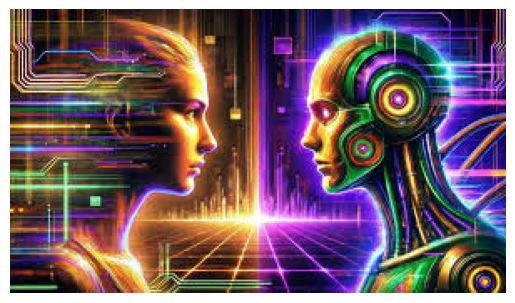

In [20]:
# %pip install ultralytics

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the YOLOv9 model (assuming YOLOv8 is being used)
model = YOLO('yolov8n.pt')  # Replace with your YOLOv9 model weights
from PIL import Image

image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiZwubgy74tlyoNN2YQHOlruXstBmV-hmwdQ&s"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Run inference
results = model.predict(source=image)

# Access prediction results
for result in results:
    boxes = result.boxes.xyxy.numpy()  # Bounding box coordinates
    confidences = result.boxes.conf.numpy()  # Confidence scores
    class_ids = result.boxes.cls.numpy()  # Class IDs
    class_names = result.names  # Class names

    # Load the image as a NumPy array for visualization
    image_np = np.array(image)

    # Draw bounding boxes and labels
    for i, box in enumerate(boxes):
        if confidences[i] > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_ids[i])]}: {confidences[i]:.2f}"

            # Draw bounding box
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Put label
            cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()




5. How do you display bounding boxes for the detected objects in an image using Faster RCNN?

d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


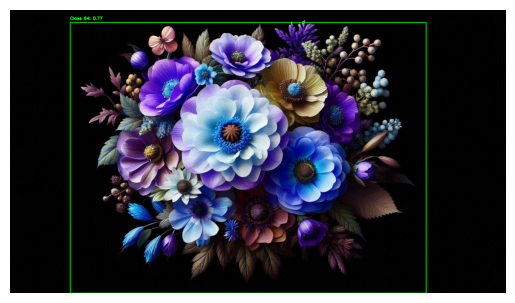

In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(weights = True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms

# Load the image
image_path = 'Designer.png'  # Replace with your image path
image = Image.open(image_path).convert("RGB")

# Transform the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

with torch.no_grad():
    predictions = model(input_tensor)
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Extract the first image's predictions
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()
labels = predictions['labels'].cpu().numpy()
scores = predictions['scores'].cpu().numpy()

# Set confidence threshold
confidence_threshold = 0.5

# Convert the image to a NumPy array
image_np = np.array(image)

# Draw bounding boxes and labels
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:  # Filter by confidence
        x1, y1, x2, y2 = map(int, box)
        label = f"Class {labels[i]}: {scores[i]:.2f}"

        # Draw bounding box
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Put label
        cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()




6. How do you perform inference on a local image using Faster RCNN?

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights=True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms

# Path to the local image
image_path = "Designer.png"

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
with torch.no_grad():
    predictions = model(input_tensor)
# Extract predictions for the first image
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()  # Bounding box coordinates
labels = predictions['labels'].cpu().numpy()  # Class labels
scores = predictions['scores'].cpu().numpy()  # Confidence scores

# Print predictions
confidence_threshold = 0.5  # Confidence threshold
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:
        print(f"  Object {i + 1}:")
        print(f"  Label: {labels[i]}")  # Class label (COCO dataset IDs)
        print(f"  Confidence: {scores[i]:.2f}")
        print(f"  Bounding Box: {box}")


d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  Object 1:
  Label: 64
  Confidence: 0.77
  Bounding Box: [ 217.15991   48.86235 1503.7554  1024.     ]


7. How can you change the confidence threshold for YOLO object detection and filter out low-confidence predictions?

In [6]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights=True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms

# Path to the local image
image_path = "Designer.png"

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
with torch.no_grad():
    predictions = model(input_tensor)
# Extract predictions for the first image
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()  # Bounding box coordinates
labels = predictions['labels'].cpu().numpy()  # Class labels
scores = predictions['scores'].cpu().numpy()  # Confidence scores

# Print predictions
confidence_threshold = 0.3  # Confidence threshold
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:
        print(f"  Object {i + 1}:")
        print(f"  Label: {labels[i]}")  # Class label (COCO dataset IDs)
        print(f"  Confidence: {scores[i]:.2f}")
        print(f"  Bounding Box: {box}")


d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  Object 1:
  Label: 64
  Confidence: 0.77
  Bounding Box: [ 217.15991   48.86235 1503.7554  1024.     ]


8. How do you plot the training and validation loss curves for model evaluation?

In [ ]:
training_losses = []  # List to store training loss
validation_losses = []  # List to store validation loss

for epoch in range(num_epochs):
    # Training loop
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    training_losses.append(train_loss / len(train_loader))

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    validation_losses.append(val_loss / len(val_loader))

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


9. How do you perform inference on multiple images from a local folder using Faster RCNN and display the 
bounding boxes for each?

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

import os
from PIL import Image

# Specify the folder containing images
image_folder = "path/to/your/image/folder"
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.png', '.jpg', '.jpeg'))]

from torchvision import transforms

# Define a transformation to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a PyTorch tensor
])

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Confidence threshold for displaying results
confidence_threshold = 0.5

# Loop through images and perform inference
for image_path in image_paths:
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Perform inference
    with torch.no_grad():
        predictions = model(input_tensor)[0]

    # Extract predictions
    boxes = predictions['boxes'].cpu().numpy()
    labels = predictions['labels'].cpu().numpy()
    scores = predictions['scores'].cpu().numpy()

    # Convert the image to a NumPy array for visualization
    image_np = np.array(image)

    # Draw bounding boxes and labels
    for i, box in enumerate(boxes):
        if scores[i] > confidence_threshold:
            x1, y1, x2, y2 = map(int, box)
            label = f"Class {labels[i]}: {scores[i]:.2f}"

            # Draw bounding box
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Put label
            cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Detections for {os.path.basename(image_path)}")
    plt.show()


10. How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster 
RCNN?

d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


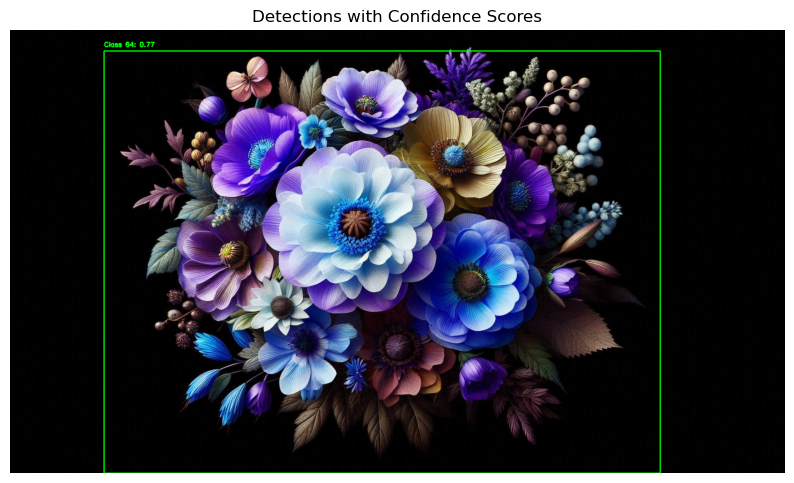

In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set to evaluation mode

from PIL import Image
from torchvision import transforms

# Load and preprocess the image
image_path = "Designer.png"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()  # Convert to tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

with torch.no_grad():
    predictions = model(input_tensor)
    
    
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extract predictions
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()  # Bounding box coordinates
scores = predictions['scores'].cpu().numpy()  # Confidence scores
labels = predictions['labels'].cpu().numpy()  # Class labels

# Set confidence threshold
confidence_threshold = 0.5

# Convert image to NumPy array for visualization
image_np = np.array(image)

# Draw bounding boxes and labels
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:  # Filter by confidence
        x1, y1, x2, y2 = map(int, box)
        label = f"Class {labels[i]}: {scores[i]:.2f}"  # Add confidence score to label

        # Draw bounding box
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Put label and confidence score
        cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes and confidence scores
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detections with Confidence Scores")
plt.show()


11. How can you save the inference results (with bounding boxes) as a new image after performing detection 
using YOLO

In [9]:
from ultralytics import YOLO  # Replace with your YOLO model library

# Load the pre-trained YOLO model
model = YOLO("yolov8n.pt")

from PIL import Image

# Load the image
image_path = "Designer.png"
image = Image.open(image_path).convert("RGB")

results = model.predict(image)  

import cv2
import numpy as np

# Convert the image to a NumPy array for visualization
image_np = np.array(image)

for result in results:
    boxes = result.boxes
    for box in boxes:
        xyxy = box.xyxy
        conf = box.conf
        cls = box.cls
        print(f"Class: {int(cls)}, Confidence: {float(conf)}, Coordinates: {xyxy}")
# Convert the image back to BGR format (for OpenCV saving)
image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# Save the image
output_path = "image_with_boxes.jpg"
cv2.imwrite(output_path, image_bgr)

print(f"Saved annotated image to: {output_path}")






0: 384x640 (no detections), 283.8ms
Speed: 6.0ms preprocess, 283.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Saved annotated image to: image_with_boxes.jpg
